# 随机森林

In [1]:
#随机化的方法有两种：一种是通过选择用于构造树的数据点
#另一种是通过选择每次划分测试的特征

#构造随机森林
#自助采样（有放回地随机抽取） n_samples
#在每个节点处，算法随机选择特征的一个子集，并对其中一个特征寻找1最佳测试 max_features
#如果max_features国大，那么随机森林中的书将会十分相似，利用最独特的特征可以轻松地你和数据
#如果max_features较小，那么随机森林中的树将会差异很大，为了很好滴拟合数据，每棵树的程度都要很大

#对于回归问题，我们可以对这些结果取平均值作为最终预测。对于分类问题，
#则用到了“软投票”（soft voting）策略。也就是说，每个算法做出“软”预测，
#给出每个可能的输出标签的概率。对所有树的预测概率取平均值，然后将概率最大的类别作
#为预测结果

In [2]:
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.datasets

In [3]:
import matplotlib.pyplot as plt

In [7]:
X,y=sklearn.datasets.make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

### 可视化

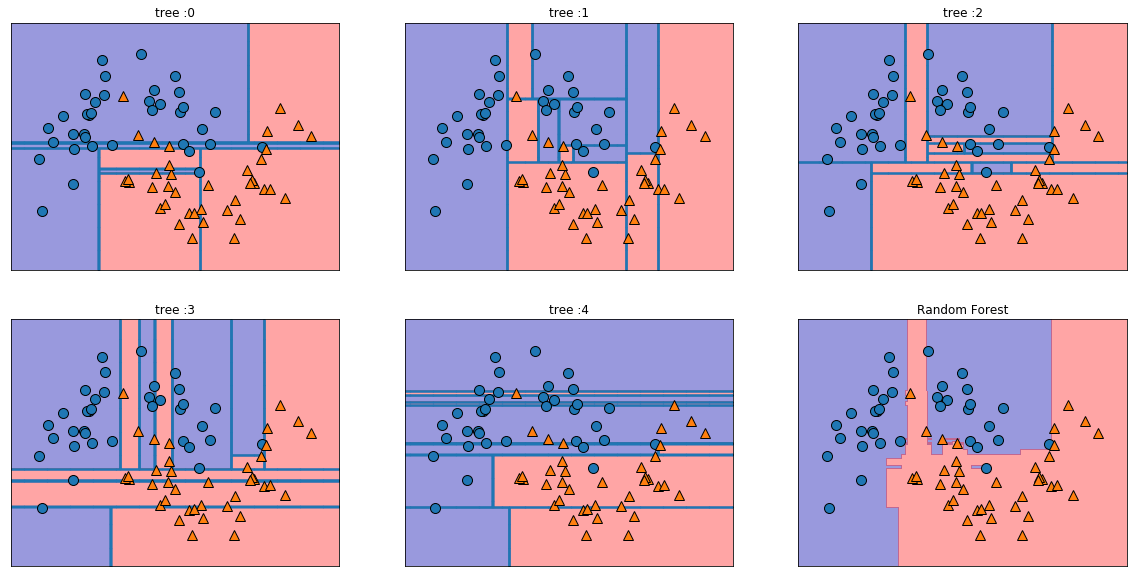

In [9]:
#
fig,axes=plt.subplots(2,3,figsize=(20,10))
#ravel()扁平化处理
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):#树被保存estimators_属性里
    ax.set_title("tree :{}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

## cancer

In [10]:
cancer=sklearn.datasets.load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


### 特征重要性

Text(0,0.5,'feature')

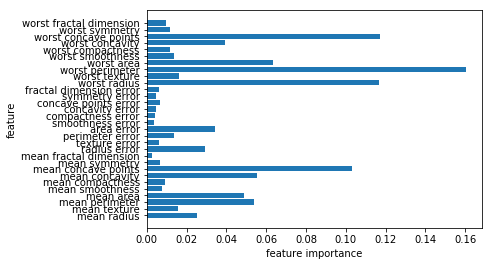

In [12]:
#所有树的特征重要性求合区平均
n_features=cancer['data'].shape[1]
plt.barh(range(n_features),forest.feature_importances_,align='center')
plt.yticks(range(n_features),cancer['feature_names'])
plt.xlabel('feature importance')
plt.ylabel('feature')

### 优点缺点和参数

In [ ]:
'''
你应该记住，随机森林本质上是随机的，设置不同的随机状态（或者不设置 random_state
参数）可以彻底改变构建的模型。森林中的树越多，它对随机状态选择的鲁棒性就越好。
如果你希望结果可以重现，固定 random_state 是很重要的。
对于维度非常高的稀疏数据（比如文本数据），随机森林的表现往往不是很好。对于这种
数据，使用线性模型可能更合适。即使是非常大的数据集，随机森林的表现通常也很好，
训练过程很容易并行在功能强大的计算机的多个 CPU 内核上。不过，随机森林需要更大
的内存，训练和预测的速度也比线性模型要慢。对一个应用来说，如果时间和内存很重要
的话，那么换用线性模型可能更为明智。
需要调节的重要参数有 n_estimators 和 max_features，可能还包括预剪枝选项（如 max_
depth）。 n_estimators 总是越大越好。对更多的树取平均可以降低过拟合，从而得到鲁棒
性更好的集成。不过收益是递减的，而且树越多需要的内存也越多，训练时间也越长。常
用的经验法则就是“在你的时间 / 内存允许的情况下尽量多”。
前面说过， max_features 决定每棵树的随机性大小，较小的 max_features 可以降低过拟
合。一般来说，好的经验就是使用默认值：对于分类，默认值是 max_features=sqrt(n_
features)；对于回归，默认值是 max_features=n_features。增大 max_features 或 max_
leaf_nodes 有时也可以提高性能。它还可以大大降低用于训练和预测的时间和空间要求。
'''